# Howdy 🤠 
> In this notebook i'll be doing **Sentiment Analysis** with **RNN (Recurrent Neural Network), GRU (Gated Recurrent Unit), and LSTM (Long short term memory)**
> if you aren't familiar with **Sentiment Analysis** : it's the process of identifying and categorizing opinions expressed in a piece of text

### Anyway enough with the yapping and let's cook 😗

<img src='https://uploads.dailydot.com/2024/04/let-him-cook-meme-.jpg?q=65&auto=format&w=1600&ar=2:1&fit=crop' height = 420 width = 620></img>

## Agenda
1. [Introduction](#Introduction)
2. [Data Preprocessing](#Pre-Processing)
3. [Model Training](#Model-Building)
4. [Evaluation](#Evaluation)

## Importing libs and getting the dataset
<a id="Introduction"></a>

In [146]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [147]:
# loading the dataset
file_path = r"data/twitter_training.csv"
df = pd.read_csv(file_path , header = None ,names=['number' , 'Border' , 'label' , 'message']) # Adjusting the column names

## About Dataset
> Twitter Sentiment Analysis Dataset
> This is an entity-level sentiment analysis dataset of twitter. Given a **message** and an **entity**, the task is to judge the sentiment of the message about the entity. There are three classes in this dataset: `Positive`, `Negative` and `Neutral`. We regard messages that are not relevant to the entity (i.e. `Irrelevant`) as Neutral.

> in this dataset we should build a model that can predict whether the sentence has a -ve or +ve or neutral effect based on the user's messages !




## Now let's discover the data and get to know it !

In [148]:
display(df.head())

number       Border     label  \
0    2401  Borderlands  Positive   
1    2401  Borderlands  Positive   
2    2401  Borderlands  Positive   
3    2401  Borderlands  Positive   
4    2401  Borderlands  Positive   

                                             message  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...

In [149]:
df.sample(5)

number                     Border       label  \
8356     9433                  Overwatch    Negative   
51130    6376                       FIFA  Irrelevant   
38907    5478                Hearthstone     Neutral   
59888    3464                   Facebook    Negative   
2875     1699  CallOfDutyBlackopsColdWar    Positive   

                                                 message  
8356                       forgot when i hated overwatch  
51130  We also are pleased indeed to announce only th...  
38907  Shifty Sophomore, Smug mer, and Fishy Flyer re...  
59888  I had to turn off Facebook, which shit doesn't...  
2875   I had chills about this unveiling with @ SidSl...

In [150]:
display(df['label'].value_counts())

label
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

In [151]:
df["Border"].value_counts()

Border
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)        

## Okay let's drop the Useless columns

> To simplify the problem we would model the text feature and it's label only 
> $$P("label"|"message")$$ 
> the probability of predicting the label giving the message only

In [152]:
df_full = df.copy() # To keep the original dataset intact

In [153]:
df[df["message"].str.strip() == ''] # empty messages

number                     Border       label message
2292     1602  CallOfDutyBlackopsColdWar  Irrelevant        
2994     1719  CallOfDutyBlackopsColdWar    Positive        
3240     1763  CallOfDutyBlackopsColdWar     Neutral        
3936     1880  CallOfDutyBlackopsColdWar    Negative        
4230     1929  CallOfDutyBlackopsColdWar    Negative        
...       ...                        ...         ...     ...
73230    8945                     Nvidia    Positive        
73518    8993                     Nvidia     Neutral        
73758    9036                     Nvidia    Negative        
73968    9073                     Nvidia    Positive        
74418    9154                     Nvidia    Positive        

[172 rows x 4 columns]

In [154]:
# removing empty messages
df = df[df["message"].str.strip() != ''] # removing empty messages

In [155]:
df[df["message"].str.strip() == ''] # empty messages

Empty DataFrame
Columns: [number, Border, label, message]
Index: []

In [156]:
df.drop(['Border' , 'number'] , axis=1 , inplace = True)

In [157]:
# Shape ? 

df.shape

(74510, 2)

In [158]:
# Null values ? 

df.isnull().sum()

label        0
message    686
dtype: int64

## Let's Drop the null rows !

In [159]:
df.dropna(inplace = True)

In [160]:
df.shape

(73824, 2)

<img src='https://media1.tenor.com/m/UGLkFpDi-vsAAAAC/avada-kedavra.gif' height = 420 width = 620></img>

### That's good

## Pre-Processing
### Now let's start with the **Pre-processing** ⚙️
### 1st - LowerCasing text

In [ ]:
df['message'] = df['message'].str.lower()

df.head()

label                                            message
0  Positive  im getting on borderlands and i will murder yo...
1  Positive  i am coming to the borders and i will kill you...
2  Positive  im getting on borderlands and i will kill you ...
3  Positive  im coming on borderlands and i will murder you...
4  Positive  im getting on borderlands 2 and i will murder ...

### 2 - Removing HTML tags ! 

In [ ]:
from bs4 import BeautifulSoup

def remove_html(text):

    clean_text = BeautifulSoup(text , 'html.parser')

    return clean_text.get_text()  

In [163]:
# this is after removing html tags with remove_html function 
# it happed beacause some messages had html tags like <unk> 
df[df["message"].str.strip() == ''] # empty messages 

Empty DataFrame
Columns: [label, message]
Index: []

In [164]:
emp_indecies = df[df["message"].str.strip() == ''].index
emp_indecies

Index([], dtype='int64')

In [ ]:
# I want to check the empty messages in the original dataset
# across all the indexes in df[df["message"].str.strip() == '']
df_full[df_full.index.isin(emp_indecies)] # <unk> messages

Empty DataFrame
Columns: [number, Border, label, message]
Index: []

In [166]:
# let's remove the empty messages from the original dataset
df = df[~df.index.isin(emp_indecies)]  # removing empty messages based on the index

In [167]:
df[df["message"].str.strip() == '']

Empty DataFrame
Columns: [label, message]
Index: []

In [168]:
df['message'] = df['message'].apply(remove_html)

display(df['message'].head(2))

C:\Users\msi\AppData\Local\Temp\ipykernel_3768\781006695.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  clean_text = BeautifulSoup(text , 'html.parser')


0    im getting on borderlands and i will murder yo...
1    i am coming to the borders and i will kill you...
Name: message, dtype: object

In [169]:
df[df["message"].str.strip() == '']

label message
353      Positive        
827      Positive        
1079   Irrelevant        
1193     Positive        
1613      Neutral        
...           ...     ...
70715    Negative        
71351    Positive        
71885    Negative        
73931    Negative        
74447    Negative        

[133 rows x 2 columns]

### 3 - Removing URLs (using regular expression (regex)

In [ ]:
import re

def clean_url(text):
    # Remove URLs from the text
    # http\S+ matches any string that starts with 'http' followed by any non-whitespace characters
    # www\S+ matches any string that starts with 'www' followed by any non-whitespace characters
    # This regex will match both http and www URLs
    # The re.sub function replaces the matched URLs with an empty string, effectively removing them from the text
    return re.sub(r'http\S+|www\S+', '', text)

In [171]:
df['message'] = df['message'].apply(clean_url)

df.head()

label                                            message
0  Positive  im getting on borderlands and i will murder yo...
1  Positive  i am coming to the borders and i will kill you...
2  Positive  im getting on borderlands and i will kill you ...
3  Positive  im coming on borderlands and i will murder you...
4  Positive  im getting on borderlands 2 and i will murder ...

In [172]:
df[df["message"].str.strip() == '']

label message
353      Positive        
827      Positive        
1079   Irrelevant        
1193     Positive        
1613      Neutral        
...           ...     ...
70715    Negative        
71351    Positive        
71885    Negative        
73931    Negative        
74447    Negative        

[134 rows x 2 columns]

In [173]:
# removing empty messages
df = df[df["message"].str.strip() != ''] # removing empty messages

In [174]:
df[df["message"].str.strip() == '']

Empty DataFrame
Columns: [label, message]
Index: []

### 4 - Removing punctuation

In [175]:
def remove_punctuation(text):
    # extracts only alphanumeric characters and spaces from the text
    # [^\w\s] matches any character that is not a word character (alphanumeric or underscore) or whitespace
    # re.sub replaces these characters with an empty string, effectively removing them
    return re.sub(r'[^\w\s]', '', text)

In [176]:
df['message'] = df['message'].apply(remove_punctuation)

df.head()

label                                            message
0  Positive  im getting on borderlands and i will murder yo...
1  Positive  i am coming to the borders and i will kill you...
2  Positive  im getting on borderlands and i will kill you all
3  Positive  im coming on borderlands and i will murder you...
4  Positive  im getting on borderlands 2 and i will murder ...

In [177]:
df[df["message"].str.strip() == '']

label       message
60        Neutral              
62        Neutral              
64        Neutral              
588       Neutral              
590       Neutral              
...           ...           ...
69803    Positive              
69878  Irrelevant              
72296    Positive              
72845    Positive              
74654    Negative              

[132 rows x 2 columns]

In [178]:
# removing empty messages
df = df[df["message"].str.strip() != ''] # removing empty messages

In [179]:
df[df["message"].str.strip() == '']

Empty DataFrame
Columns: [label, message]
Index: []

### 5 - Removing Stop words

#### Stop words like : "the," "is," "and," "in," "on" don't add much of a value to the model in this task

In [ ]:
# Using NLTK instead of spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

def remove_stopwords(text):
    if not isinstance(text, str):  # Handle non-string inputs
        return text
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    
    # Join tokens back into a string
    return " ".join(filtered_tokens) 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\msi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [181]:
df['message'] = df['message'].apply(remove_stopwords)

In [182]:
df[df["message"].str.strip() == '']

label message
11     Positive        
53      Neutral        
65      Neutral        
191    Positive        
203    Negative        
...         ...     ...
74477  Positive        
74507   Neutral        
74591   Neutral        
74597  Positive        
74621  Positive        

[1312 rows x 2 columns]

In [183]:
# show in the original dataset the empty messages
df_full[df_full.index.isin(df[df["message"].str.strip() == ''].index)]

number       Border     label    message
11       2402  Borderlands  Positive        was
53       2409  Borderlands   Neutral        all
65       2411  Borderlands   Neutral    .. what
191      2432  Borderlands  Positive        why
203      2434  Borderlands  Negative          I
...       ...          ...       ...        ...
74477    9166       Nvidia  Positive  <unk> The
74507    9171       Nvidia   Neutral        You
74591    9185       Nvidia   Neutral        you
74597    9186       Nvidia  Positive       from
74621    9190       Nvidia  Positive       were

[1312 rows x 4 columns]

In [184]:
# removing empty messages
df = df[df["message"].str.strip() != ''] # removing empty messages

In [185]:
df.head()

label                          message
0  Positive    im getting borderlands murder
1  Positive              coming borders kill
2  Positive      im getting borderlands kill
3  Positive     im coming borderlands murder
4  Positive  im getting borderlands 2 murder

### 6 - Removing Emojis !

In [186]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [187]:
import emoji

def remove_emojis(text):
    return emoji.demojize(text)

df['message'] = df['message'].apply(remove_emojis)

In [188]:
df[df["message"].str.strip() == ''] # empty messages

Empty DataFrame
Columns: [label, message]
Index: []

### 7 - Lemmatization
#### changing the word back to its roots like : playing -> play , ate -> eat

In [189]:
import nltk
from nltk.stem import WordNetLemmatizer

# Download WordNet resource required for lemmatization
nltk.download('wordnet')

def lemmatize_text(text):
    # Initialize lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Lemmatize each token
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back into a string
    return " ".join(lemmatized_tokens)

df['message_lemmatized'] = df['message'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\msi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [190]:
df.head()

label                          message              message_lemmatized
0  Positive    im getting borderlands murder    im getting borderland murder
1  Positive              coming borders kill              coming border kill
2  Positive      im getting borderlands kill      im getting borderland kill
3  Positive     im coming borderlands murder     im coming borderland murder
4  Positive  im getting borderlands 2 murder  im getting borderland 2 murder

## We finished the cleaning part ! Hooray 🥳
### now let's put all what we've done to process incoming input in the future !

In [191]:
def clean_text(text):
    if not isinstance(text, str):  # Handle non-string inputs
        return text
    
    text = text.lower()  # 1️⃣ Convert to lowercase
    text = remove_html(text)  # 2️⃣ Remove HTML
    text = clean_url(text)  # 3️⃣ Remove URLs
    text = remove_punctuation(text)  # 4️⃣ Remove punctuation
    text = remove_stopwords(text)  # 5️⃣ Remove stopwords
    text = remove_emojis(text)  # 6️⃣ Remove emojis
    text = lemmatize_text(text)  # 7️⃣ Lemmatization
    
    return text

In [192]:
# let's give it a test !

new_text = "Heyyyy!!! 😊 Check this out: https://example.com <b>Awesome!</b>"
cleaned_text = clean_text(new_text)
print(cleaned_text)

heyyyy check awesome


## Word Cloud

In [193]:
"".join(df['message_lemmatized'].tolist())

'im getting borderland murdercoming border killim getting borderland killim coming borderland murderim getting borderland 2 murderim getting borderland murderspent hour making something fun dont know huge borderland fan maya one favorite character decided make wallpaper pc original image versus creation made enjoy pictwittercommlsi5wf9jgspent couple hour something fun dont know im huge borderland fan maya one favorite character decided make wallpaper pc here original picture compared creation made fun pictwittercom mlsi5wf9jgspent hour something fun dont know im huge borderland fan maya one favorite characterspent hour making something fun dont know huge rhandlerr fan maya one favorite character decided make wallpaper pc original image versus creation made enjoy pictwittercommlsi5wf9jg2010 spent hour making something fun dont know huge rhandlerr fan maya one favorite character decided make wallpaper pc original image versus creation made enjoy pictwittercommlsi5wf9jgrockhard la varlope

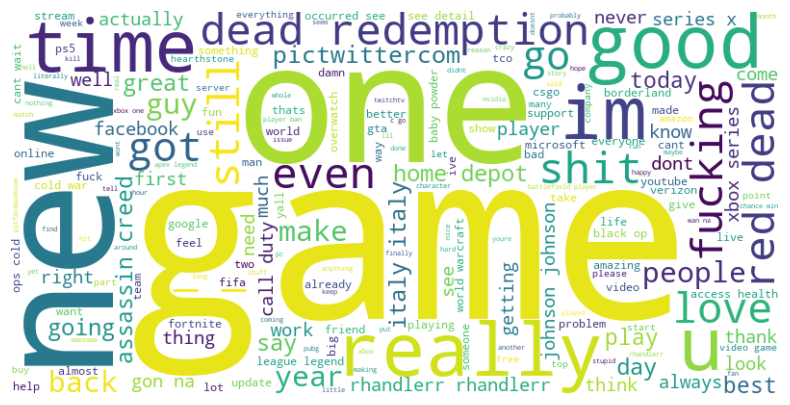

In [194]:
from wordcloud import WordCloud

# Convert the column to a single string
text = "".join(df['message_lemmatized'].tolist())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Now let's a word cloud of the +ve sentences and the -ve according to the data

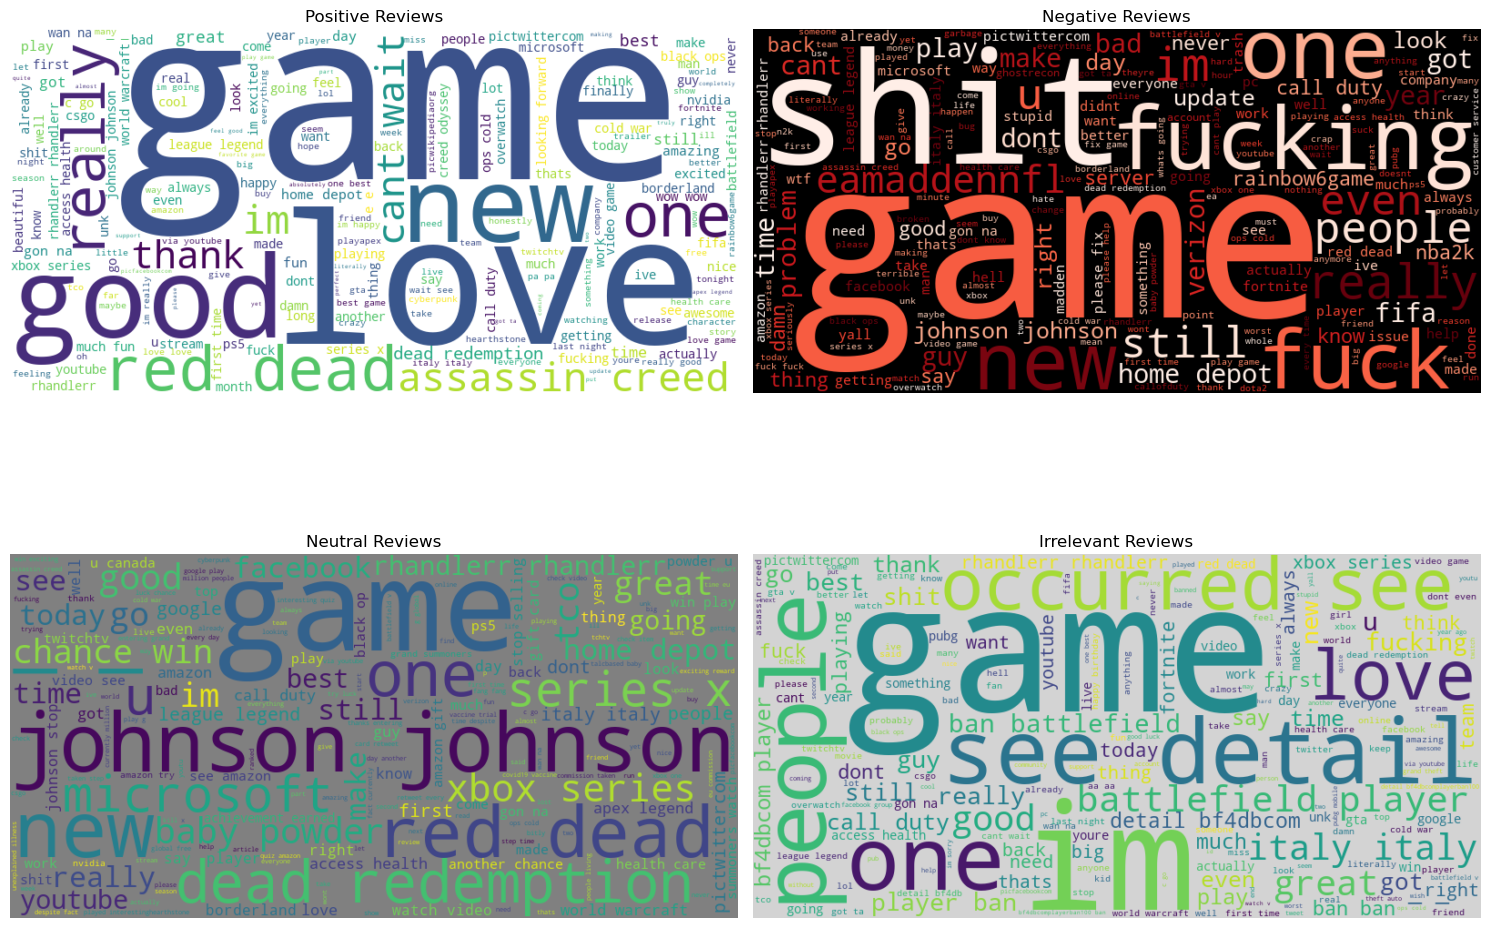

In [195]:
# Combine text data for each sentiment category
positive_text = " ".join(df[df["label"] == "Positive"]["message_lemmatized"])
negative_text = " ".join(df[df["label"] == "Negative"]["message_lemmatized"])
neutral_text = " ".join(df[df["label"] == "Neutral"]["message_lemmatized"])
irrelevant_text = " ".join(df[df["label"] == "Irrelevant"]["message_lemmatized"])

# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)
neutral_wordcloud = WordCloud(width=800, height=400, background_color='gray').generate(neutral_text)
irrelevant_wordcloud = WordCloud(width=800, height=400, background_color='lightgray').generate(irrelevant_text)

# Plot word clouds
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

ax[0, 0].imshow(positive_wordcloud, interpolation='bilinear')
ax[0, 0].set_title("Positive Reviews")
ax[0, 0].axis("off")

ax[0, 1].imshow(negative_wordcloud, interpolation='bilinear')
ax[0, 1].set_title("Negative Reviews")
ax[0, 1].axis("off")

ax[1, 0].imshow(neutral_wordcloud, interpolation='bilinear')
ax[1, 0].set_title("Neutral Reviews")
ax[1, 0].axis("off")

ax[1, 1].imshow(irrelevant_wordcloud, interpolation='bilinear')
ax[1, 1].set_title("Irrelevant Reviews")
ax[1, 1].axis("off")

plt.tight_layout()
plt.show()

## from this word cloud we can remove the word game as it's illogical to exist in every class !

In [ ]:
df["message_lemmatized"] = df["message_lemmatized"].str.replace(r'\bgame\b', '', regex=True)


In [197]:
df[df['message_lemmatized'].str.strip() == '']

label message message_lemmatized
4241   Negative    game                   
22181  Negative    game                   
69574  Positive    game

In [199]:
# removing empty messages
df = df[df["message_lemmatized"].str.strip() != ''] # removing empty messages

In [200]:
# check the empty messages
df[df['message_lemmatized'].str.strip() == '']

Empty DataFrame
Columns: [label, message, message_lemmatized]
Index: []

## Pre-Processing for the Target

In [201]:
# I'm going to mix the neutral class with the Irrelevant
df['label'] = df['label'].map({'Positive' : 1 ,  'Negative' : 0 ,'Neutral':2 , 'Irrelevant' : 2 })

In [202]:
df['label'].value_counts()

label
2    30241
0    21880
1    20122
Name: count, dtype: int64

## Split the data
#### into ( train , test and validation data ) 
#### since that there's imbalance in the target i'm going to use stratified sampling

In [203]:
from sklearn.model_selection import train_test_split

X = df['message_lemmatized'] # feature matrix ( in this case it's just a vectore cause it's only one column)
y = df['label'] # target column

X_train1 , X_test , y_train1 , y_test = train_test_split(X,y , random_state = 42 , test_size = 0.2  , shuffle = True)
X_train , X_val , y_train , y_val = train_test_split(X_train1 , y_train1 , random_state = 42 , test_size = 0.15  , shuffle = True)

In [204]:
X_train.shape , X_val.shape , X_test.shape , y_train.shape , y_val.shape , y_test.shape

((49124,), (8670,), (14449,), (49124,), (8670,), (14449,))

## Tokenization 
#### Converting words into numerical tokens

In [205]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# notting means nothing special, it's just a placeholder for out-of-vocabulary words
# oov_token is used to handle out-of-vocabulary words
tokenizer = Tokenizer(oov_token = 'nothing') 
# hello -> 2, play -> 3, game -> 4, etc. [hello who play this game]
# nothing -> 1
# [hello, who, play, this, game]
# [2, 1, 3, 1, 3]
# 2-> [0, 0,0, 1, 0, 0]
# 1 -> [0, 0, 0, 0, 0, 1]

# we call this method to build the tokenizer on the train data only to avoid data leakage !
tokenizer.fit_on_texts(X_train) 

In [228]:
#  returns the total number of documents (sentences) processed by the tokenizer
# just to make sure that all the sentences have been converted to tokens !

tokenizer.document_count

49124

### Conversion to sequence
#### used to convert each text in the data to sequences of integers based on the tokenizer's vocabulary

In [208]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_val_seq = tokenizer.texts_to_sequences(X_val)

### Padding
#### we apply padding on the data to ensure that each sequence is the same length !

In [ ]:
# finding the max length
max_len = max(len(tokens) for tokens in X_train_seq)
print("Maximum sequence length (maxlen):", max_len)


Maximum sequence length (maxlen): 99


In [210]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Perform padding on X_train and X_test sequences and X_val

X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post')
X_val_padded = pad_sequences(X_val_seq, maxlen=max_len, padding='post')

In [211]:
# Print the padded sequences for X_train and X_test
print("X_train_padded:")
print(X_train_padded[:1])
print("\nX_test_padded:")
print(X_test_padded[:1])
print("\nX_val_padded:")
print(X_val_padded[:1])

X_train_padded:
[[  81  124 1367  251  130  128 1869 1043   77   43 1869 1043 8000  762
  2400  502    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]]

X_test_padded:
[[  497 20337 10422   117     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0    

In [213]:
tokenizer.word_index

{'nothing': 216,
 'like': 2,
 'im': 3,
 'get': 4,
 '2': 5,
 'one': 6,
 'good': 7,
 'play': 8,
 'time': 9,
 'love': 10,
 'really': 11,
 'new': 12,
 'u': 13,
 'johnson': 14,
 'shit': 15,
 'people': 16,
 'see': 17,
 '3': 18,
 'cant': 19,
 'dont': 20,
 'got': 21,
 'best': 22,
 'still': 23,
 'player': 24,
 'year': 25,
 'go': 26,
 'day': 27,
 'make': 28,
 'great': 29,
 'even': 30,
 'look': 31,
 'playing': 32,
 'xbox': 33,
 'fucking': 34,
 'facebook': 35,
 'fuck': 36,
 'google': 37,
 'amazon': 38,
 'dead': 39,
 'please': 40,
 'rhandlerr': 41,
 '4': 42,
 'back': 43,
 '1': 44,
 'know': 45,
 'verizon': 46,
 'microsoft': 47,
 'much': 48,
 'red': 49,
 'going': 50,
 'fifa': 51,
 'guy': 52,
 'would': 53,
 'ive': 54,
 'first': 55,
 'today': 56,
 '5': 57,
 'want': 58,
 'fun': 59,
 'pubg': 60,
 'video': 61,
 'home': 62,
 'borderland': 63,
 'say': 64,
 'gta': 65,
 'call': 66,
 'thing': 67,
 'ever': 68,
 'team': 69,
 'world': 70,
 'nvidia': 71,
 'also': 72,
 'fix': 73,
 'thank': 74,
 'work': 75,
 'bad': 

In [215]:
# example on tokenization
example_text = "This is an example sentence."
example_tokens = tokenizer.texts_to_sequences([example_text])
print("Example tokens:", example_tokens)
# Example of padding
example_padded = pad_sequences(example_tokens, maxlen=max_len, padding='post')
print("Example padded:", example_padded)
# reconstructing the original text from tokens
reconstructed_text = tokenizer.sequences_to_texts(example_padded)
print("Reconstructed text:", reconstructed_text)


Example tokens: [[216, 16447, 17379, 1557, 7258]]
Example padded: [[  216 16447 17379  1557  7258     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]]
Reconstructed text: ['nothing is an example sentence nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing not

In [225]:
tokenizer.word_counts

OrderedDict([('thanks', 940),
             ('everyone', 709),
             ('joined', 65),
             ('tonight', 376),
             ('way', 689),
             ('stream', 697),
             ('monster', 43),
             ('hunter', 89),
             ('battlefield', 954),
             ('back', 1307),
             ('jeez', 5),
             ('teammate', 124),
             ('decide', 31),
             ('lmao', 190),
             ('mercy', 37),
             ('experienced', 32),
             ('character', 384),
             ('superwatch', 1),
             ('requires', 21),
             ('prioritization', 5),
             ('quick', 98),
             ('decisionmaking', 6),
             ('sense', 112),
             ('play', 2421),
             ('love', 2269),
             ('much', 1265),
             ('shes', 74),
             ('sweet', 116),
             ('cat', 30),
             ('im', 3322),
             ('happy', 803),
             ('babycakes', 5),
             ('mareeeep', 1),
          

In [230]:
tokenizer.word_index

{'nothing': 216,
 'like': 2,
 'im': 3,
 'get': 4,
 '2': 5,
 'one': 6,
 'good': 7,
 'play': 8,
 'time': 9,
 'love': 10,
 'really': 11,
 'new': 12,
 'u': 13,
 'johnson': 14,
 'shit': 15,
 'people': 16,
 'see': 17,
 '3': 18,
 'cant': 19,
 'dont': 20,
 'got': 21,
 'best': 22,
 'still': 23,
 'player': 24,
 'year': 25,
 'go': 26,
 'day': 27,
 'make': 28,
 'great': 29,
 'even': 30,
 'look': 31,
 'playing': 32,
 'xbox': 33,
 'fucking': 34,
 'facebook': 35,
 'fuck': 36,
 'google': 37,
 'amazon': 38,
 'dead': 39,
 'please': 40,
 'rhandlerr': 41,
 '4': 42,
 'back': 43,
 '1': 44,
 'know': 45,
 'verizon': 46,
 'microsoft': 47,
 'much': 48,
 'red': 49,
 'going': 50,
 'fifa': 51,
 'guy': 52,
 'would': 53,
 'ive': 54,
 'first': 55,
 'today': 56,
 '5': 57,
 'want': 58,
 'fun': 59,
 'pubg': 60,
 'video': 61,
 'home': 62,
 'borderland': 63,
 'say': 64,
 'gta': 65,
 'call': 66,
 'thing': 67,
 'ever': 68,
 'team': 69,
 'world': 70,
 'nvidia': 71,
 'also': 72,
 'fix': 73,
 'thank': 74,
 'work': 75,
 'bad': 

In [229]:
tokenizer.word_index["nothing"]  # This is the OOV token

216

In [ ]:
# Define vocab size based on the tokenizer
# we add 2 to account for the OOV token and padding token (0)
vocab_size = len(tokenizer.word_index) + 2

print(vocab_size)

32430


## Model Building

Article about the callbacks
* https://www.digitalocean.com/community/tutorials/tensorflow-callbacks

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
# optimizer 
from tensorflow.keras.optimizers import Adam

# RNN model using SimpleRNN layers without Bidirectional

rnn_model = models.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=100),
    layers.SimpleRNN(128, return_sequences=False, dropout=0.2, recurrent_dropout=0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(3, activation='softmax')
])

# Compile the model 0, 1, 2 are the classes
rnn_model.compile(optimizer=Adam(learning_rate=0.005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Print the model summary
rnn_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, None, 100)         3243000   
                                                                 
 simple_rnn_13 (SimpleRNN)   (None, 128)               29312     
                                                                 
 dense_20 (Dense)            (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_22 (Dense)            (None, 3)                

> `ReduceLROnPlateau` is a callback in Keras/TensorFlow that **dynamically reduces the learning rate** during training when a specified metric (typically validation loss or accuracy) stops improving. This can help improve model convergence by adjusting the learning rate based on the model's performance, preventing overshooting in later epochs.

* `monitor`: Metric to track (e.g., 'val_loss').
* `factor`: Factor by which the learning rate will be reduced (e.g., 0.1 means reducing by 10%).
* `patience`: Number of epochs with no improvement before reducing the learning rate.
* `min_lr`: Minimum value to which the learning rate can drop.
* `verbose`: Whether to print a message when the learning rate is reduced.




In [246]:
# train the model
history_rnn = rnn_model.fit(X_train_padded, y_train,
                             epochs=10, batch_size=200, 
                             validation_data=(X_val_padded, y_val), 
                             callbacks=[
                                 tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
                                 tf.keras.callbacks.ModelCheckpoint('Models/rnn_model.keras', save_best_only=True, monitor='val_loss', mode='min'),
                                 tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
                                 ]        
                             )


Epoch 1/10
246/246 [==============================] - 37s 144ms/step - loss: 1.0882 - accuracy: 0.4117 - val_loss: 1.0809 - val_accuracy: 0.4238 - lr: 0.0050
Epoch 2/10
246/246 [==============================] - 32s 130ms/step - loss: 1.0830 - accuracy: 0.4173 - val_loss: 1.0805 - val_accuracy: 0.4238 - lr: 0.0050
Epoch 3/10
246/246 [==============================] - 32s 130ms/step - loss: 1.0831 - accuracy: 0.4172 - val_loss: 1.0805 - val_accuracy: 0.4238 - lr: 0.0050
Epoch 4/10
246/246 [==============================] - 31s 127ms/step - loss: 1.0830 - accuracy: 0.4173 - val_loss: 1.0805 - val_accuracy: 0.4238 - lr: 0.0050
Epoch 5/10
246/246 [==============================] - ETA: 0s - loss: 1.0832 - accuracy: 0.4173
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0024999999441206455.
246/246 [==============================] - 30s 122ms/step - loss: 1.0832 - accuracy: 0.4173 - val_loss: 1.0805 - val_accuracy: 0.4238 - lr: 0.0050
Epoch 6/10
246/246 [=============================

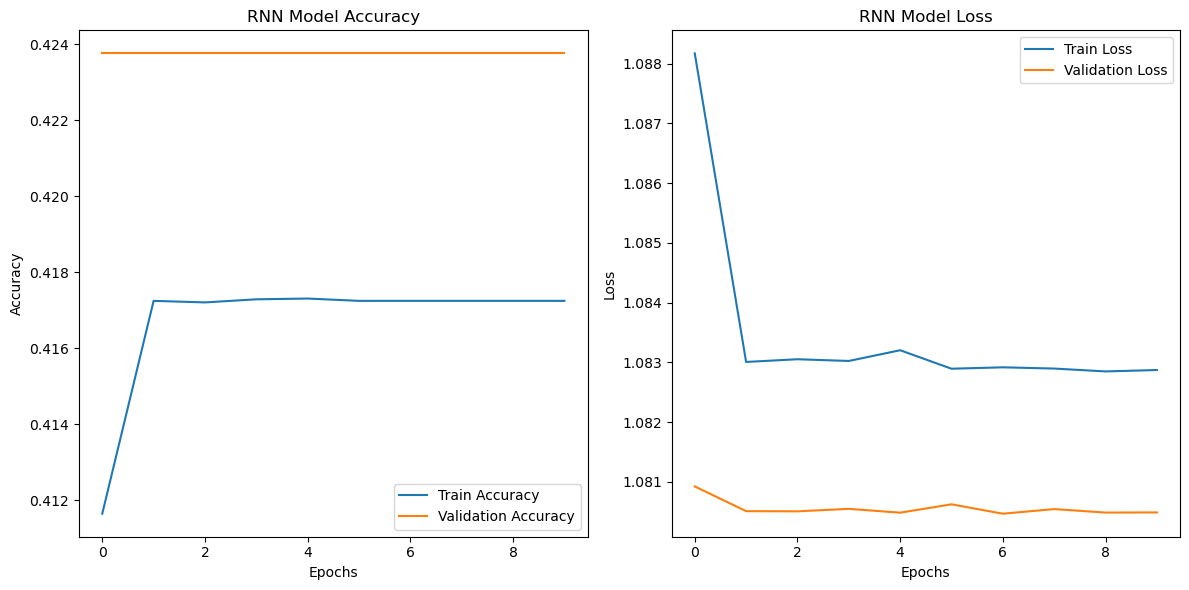

In [248]:
# plot the accuracy and the loss in a subplot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('RNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['loss'], label='Train Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.title('RNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


In [251]:
# let's now implment an equivialnt model using LSTM layers
lstm_model = models.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=100),
    layers.LSTM(128, return_sequences=False, dropout=0.2, recurrent_dropout=0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(3, activation='softmax')
])

# Compile the model
lstm_model.compile(optimizer=Adam(learning_rate=0.005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Print the model summary
lstm_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, None, 100)         3243000   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense_23 (Dense)            (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_24 (Dense)            (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_25 (Dense)            (None, 3)                

In [252]:
# train the lstm model
history_lstm = lstm_model.fit(X_train_padded, y_train,
                             epochs=10, batch_size=200, 
                             validation_data=(X_val_padded, y_val), 
                             callbacks=[
                                 tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
                                 tf.keras.callbacks.ModelCheckpoint('Models/lstm_model.keras', save_best_only=True, monitor='val_loss', mode='min'),
                                 tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
                                 ]        
                             )  

Epoch 1/10
246/246 [==============================] - 145s 573ms/step - loss: 1.0849 - accuracy: 0.4169 - val_loss: 1.0804 - val_accuracy: 0.4238 - lr: 0.0050
Epoch 2/10
246/246 [==============================] - 130s 529ms/step - loss: 1.0832 - accuracy: 0.4173 - val_loss: 1.0808 - val_accuracy: 0.4238 - lr: 0.0050
Epoch 3/10
246/246 [==============================] - 134s 545ms/step - loss: 1.0832 - accuracy: 0.4173 - val_loss: 1.0809 - val_accuracy: 0.4238 - lr: 0.0050
Epoch 4/10
246/246 [==============================] - ETA: 0s - loss: 1.0831 - accuracy: 0.4173
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0024999999441206455.
246/246 [==============================] - 138s 560ms/step - loss: 1.0831 - accuracy: 0.4173 - val_loss: 1.0806 - val_accuracy: 0.4238 - lr: 0.0050
Epoch 5/10
246/246 [==============================] - 141s 572ms/step - loss: 1.0830 - accuracy: 0.4173 - val_loss: 1.0809 - val_accuracy: 0.4238 - lr: 0.0025
Epoch 6/10
246/246 [========================

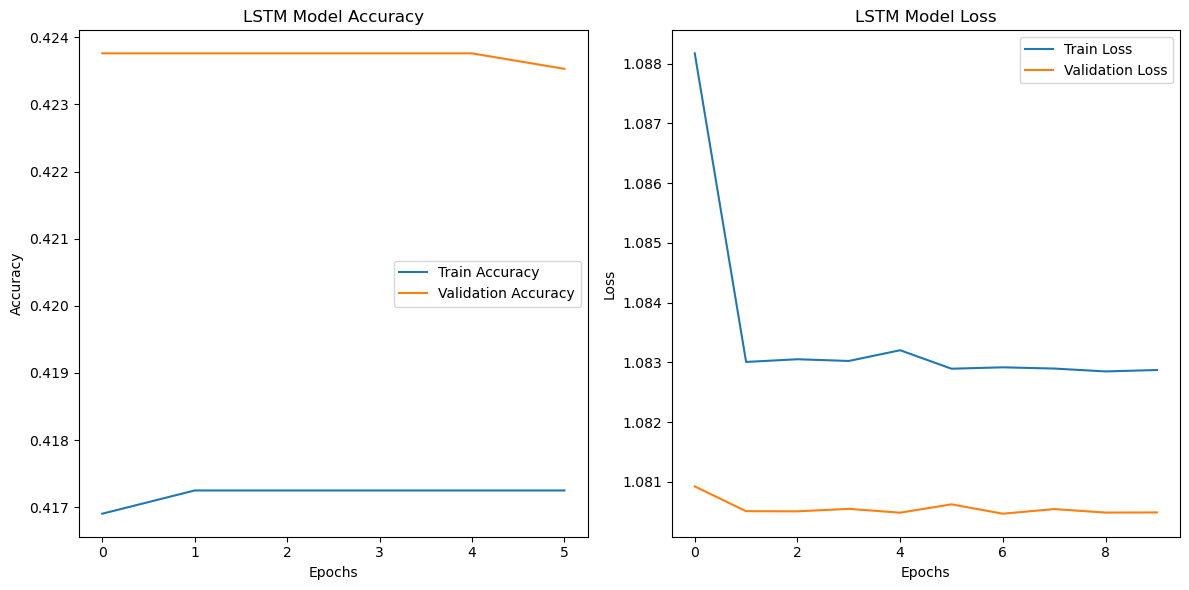

In [253]:
# plot the accuracy and the loss in a subplot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['loss'], label='Train Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


In [254]:
# let's now implment an equivialnt model using GRU layers
gru_model = models.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=100),
    layers.GRU(128, return_sequences=False, dropout=0.2, recurrent_dropout=0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(3, activation='softmax')
])
# Compile the model
gru_model.compile(optimizer=Adam(learning_rate=0.005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Print the model summary
gru_model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, None, 100)         3243000   
                                                                 
 gru (GRU)                   (None, 128)               88320     
                                                                 
 dense_26 (Dense)            (None, 64)                8256      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_28 (Dense)            (None, 3)               

In [255]:
# train the model
history_gru = gru_model.fit(X_train_padded, y_train,
                             epochs=10, batch_size=200, 
                             validation_data=(X_val_padded, y_val), 
                             callbacks=[
                                 tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
                                 tf.keras.callbacks.ModelCheckpoint('Models/gru_model.keras', save_best_only=True, monitor='val_loss', mode='min'),
                                 tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
                                 ]        
                             )

Epoch 1/10
246/246 [==============================] - 114s 452ms/step - loss: 1.0845 - accuracy: 0.4164 - val_loss: 1.0808 - val_accuracy: 0.4238 - lr: 0.0050
Epoch 2/10
246/246 [==============================] - 109s 445ms/step - loss: 1.0832 - accuracy: 0.4173 - val_loss: 1.0807 - val_accuracy: 0.4238 - lr: 0.0050
Epoch 3/10
246/246 [==============================] - 119s 484ms/step - loss: 1.0831 - accuracy: 0.4173 - val_loss: 1.0808 - val_accuracy: 0.4238 - lr: 0.0050
Epoch 4/10
246/246 [==============================] - 117s 475ms/step - loss: 1.0832 - accuracy: 0.4173 - val_loss: 1.0806 - val_accuracy: 0.4238 - lr: 0.0050
Epoch 5/10
246/246 [==============================] - ETA: 0s - loss: 1.0840 - accuracy: 0.4162
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0024999999441206455.
246/246 [==============================] - 114s 463ms/step - loss: 1.0840 - accuracy: 0.4162 - val_loss: 1.0808 - val_accuracy: 0.4238 - lr: 0.0050
Epoch 6/10
246/246 [========================

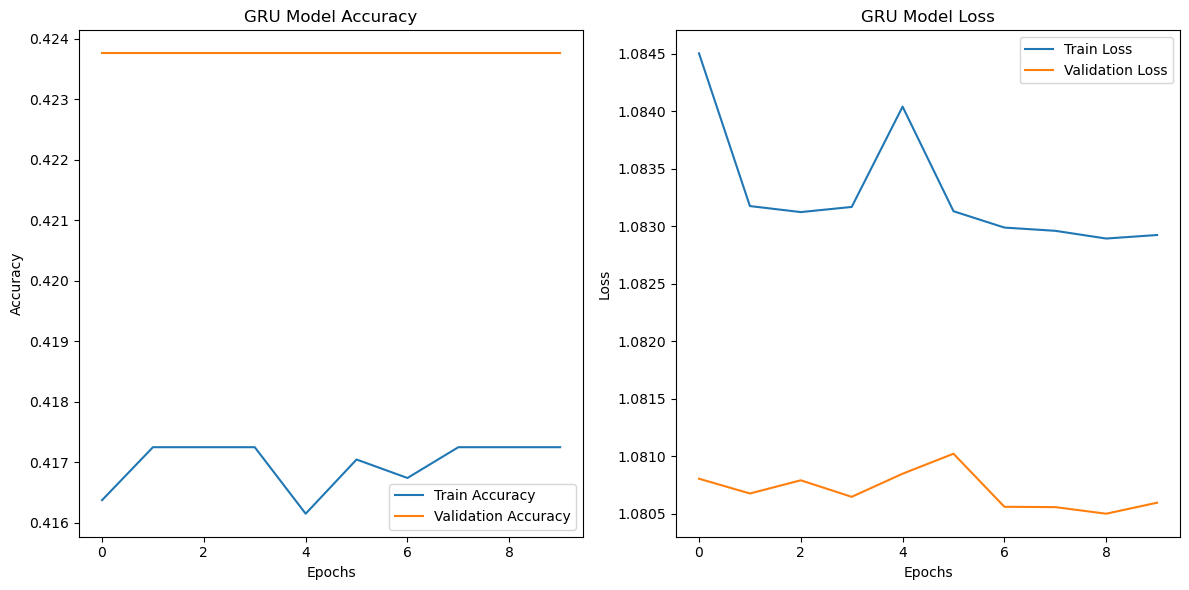

In [256]:
# gru plot 
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_gru.history['accuracy'], label='Train Accuracy')
plt.plot(history_gru.history['val_accuracy'], label='Validation Accuracy')
plt.title('GRU Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_gru.history['loss'], label='Train Loss')
plt.plot(history_gru.history['val_loss'], label='Validation Loss')
plt.title('GRU Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


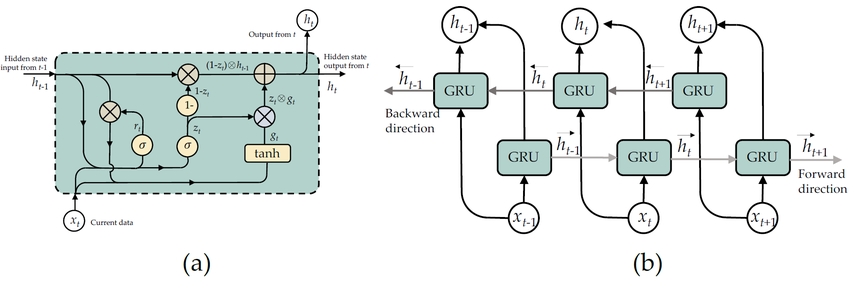

In [257]:
# let's make more complex using bidirectional layers and GRUs 
from tensorflow.keras.layers import Bidirectional
bidirectional_gru_model = models.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=100),
    Bidirectional(layers.GRU(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)),
    Bidirectional(layers.GRU(64, return_sequences=False, dropout=0.2, recurrent_dropout=0.2)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(3, activation='softmax')
])
# Compile the model
bidirectional_gru_model.compile(optimizer=Adam(learning_rate=0.005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Print the model summary
bidirectional_gru_model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, None, 100)         3243000   
                                                                 
 bidirectional (Bidirection  (None, None, 256)         176640    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               123648    
 onal)                                                           
                                                                 
 dense_29 (Dense)            (None, 64)                8256      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_30 (Dense)            (None, 32)              

In [258]:
# train the gru_bi model
history_gru_bi = bidirectional_gru_model.fit(X_train_padded, y_train,
                             epochs=10, batch_size=200, 
                             validation_data=(X_val_padded, y_val), 
                             callbacks=[
                                 tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
                                 tf.keras.callbacks.ModelCheckpoint('Models/bidirectional_gru_model.keras', save_best_only=True, monitor='val_loss', mode='min'),
                                 tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
                                 ]        
                             )

Epoch 1/10
246/246 [==============================] - 861s 3s/step - loss: 0.7300 - accuracy: 0.6840 - val_loss: 0.4915 - val_accuracy: 0.8037 - lr: 0.0050
Epoch 2/10
246/246 [==============================] - 864s 4s/step - loss: 0.3147 - accuracy: 0.8894 - val_loss: 0.3626 - val_accuracy: 0.8692 - lr: 0.0050
Epoch 3/10
246/246 [==============================] - 903s 4s/step - loss: 0.1836 - accuracy: 0.9361 - val_loss: 0.3340 - val_accuracy: 0.8815 - lr: 0.0050
Epoch 4/10
246/246 [==============================] - 925s 4s/step - loss: 0.1350 - accuracy: 0.9520 - val_loss: 0.3301 - val_accuracy: 0.8854 - lr: 0.0050
Epoch 5/10
246/246 [==============================] - 1003s 4s/step - loss: 0.1168 - accuracy: 0.9589 - val_loss: 0.3480 - val_accuracy: 0.8878 - lr: 0.0050
Epoch 6/10
246/246 [==============================] - 1040s 4s/step - loss: 0.1005 - accuracy: 0.9645 - val_loss: 0.3746 - val_accuracy: 0.8910 - lr: 0.0050
Epoch 7/10
246/246 [==============================] - ETA: 0s 

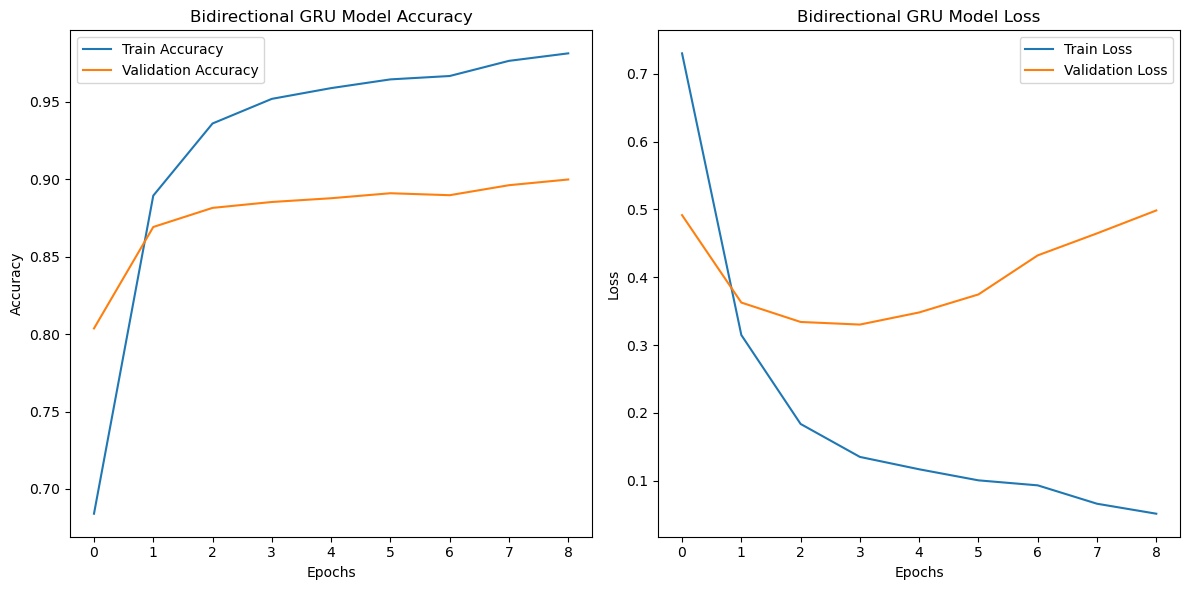

In [259]:
# plotting the training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_gru_bi.history['accuracy'], label='Train Accuracy')
plt.plot(history_gru_bi.history['val_accuracy'], label='Validation Accuracy')
plt.title('Bidirectional GRU Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_gru_bi.history['loss'], label='Train Loss')
plt.plot(history_gru_bi.history['val_loss'], label='Validation Loss')
plt.title('Bidirectional GRU Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

## Evaluation

In [267]:
# let's load bidirectional_gru_model
bi_gru_model = tf.keras.models.load_model('Models/bidirectional_gru_model.keras')

# let's use it for a prediction
sample_text = """Prediction: PlayStation FY2026 will break the record for most PlayStation consoles sold in a single year"""
sample_seq = tokenizer.texts_to_sequences([sample_text])
sample_padded = pad_sequences(sample_seq, maxlen=max_len, padding='post')
# make a prediction
predicted_class = bi_gru_model.predict(sample_padded)
print("Predicted propabilities:", predicted_class)
predicted_class = np.argmax(predicted_class, axis=1)
print("Predicted class:", predicted_class)
# decoding the predicted class
# df['label'] = df['label'].map({'Positive' : 1 ,  'Negative' : 0 ,'Neutral':2 , 'Irrelevant' : 2 })
predicted_label = {0: 'Negative', 1: 'Positive', 2: 'Neutral/Irrelevant'}
print("Predicted label:", predicted_label[predicted_class[0]])

1/1 [==============================] - 1s 1s/step
Predicted propabilities: [[0.61593294 0.01835189 0.36571515]]
Predicted class: [0]
Predicted label: Negative


In [268]:
# predicting on the test set
y_prob = bi_gru_model.predict(X_test_padded)
# converting the probabilities to classes
y_pred = np.argmax(y_prob, axis=1)
# converting the predicted classes to labels
y_pred_labels = [predicted_label[class_id] for class_id in y_pred]
# Accuracy 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

452/452 [==============================] - 80s 178ms/step
Test Accuracy: 0.8865665443975361


## Confusion Matrix

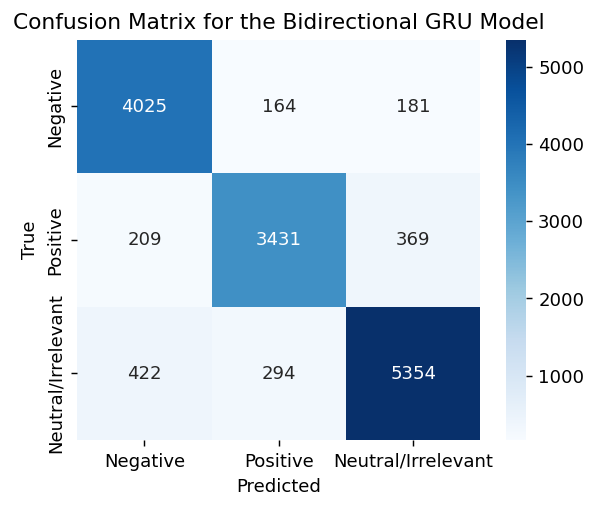

In [276]:
from sklearn.metrics import confusion_matrix , classification_report

cfm = confusion_matrix(y_test , y_pred)
plt.figure(figsize=(5, 4), dpi=130)
sns.heatmap(cfm, annot=True, fmt='d', cmap='Blues', xticklabels=predicted_label.values(), yticklabels=predicted_label.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for the Bidirectional GRU Model')
plt.show()


In [277]:
# classification report
report = classification_report(y_test, y_pred)

# the report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4370
           1       0.88      0.86      0.87      4009
           2       0.91      0.88      0.89      6070

    accuracy                           0.89     14449
   macro avg       0.88      0.89      0.88     14449
weighted avg       0.89      0.89      0.89     14449



In [ ]:
# saving the tokenizer
tokenizer_path = 'Models/tokenizer.json'
with open(tokenizer_path, 'w') as f:
    tokenizer_json = tokenizer.to_json()
    f.write(tokenizer_json)

# reloading the tokenizer and using it to predict
from tensorflow.keras.preprocessing.text import tokenizer_from_json
with open(tokenizer_path, 'r') as f:
    tokenizer_json = f.read()
tokenizer_ld = tokenizer_from_json(tokenizer_json)


In [310]:
import numpy as np

sample_text, true_label = X_test.sample(1).iloc[0], predicted_label[y_test.sample(1).iloc[0]]

print("Sample text:", sample_text)
print("True label:", true_label)

# Converting the sample text to tokens
sample_seq = tokenizer_ld.texts_to_sequences([sample_text])
sample_padded = pad_sequences(sample_seq, maxlen=max_len, padding='post')

# Make a prediction
predicted_probs = bi_gru_model.predict(sample_padded)
print("Predicted probabilities:", predicted_probs)
predicted_class = np.argmax(predicted_probs, axis=1)[0]
print("Predicted class:", predicted_class)
print("Predicted label:", predicted_label[predicted_class])

# Check if the prediction is correct
is_correct = true_label_id == predicted_class
print(f"Prediction is {'correct' if is_correct else 'incorrect'}")

Sample text: police interrupted league legend  something
True label: Neutral/Irrelevant
1/1 [==============================] - 0s 108ms/step
Predicted probabilities: [[8.8393863e-04 1.4178583e-04 9.9897420e-01]]
Predicted class: 2
Predicted label: Neutral/Irrelevant
Prediction is correct


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for a more professional look
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")

# Collecting model information
models = ['Simple RNN', 'LSTM', 'GRU', 'Bidirectional GRU']
model_objects = [rnn_model, lstm_model, gru_model, bidirectional_gru_model]
histories = [history_rnn, history_lstm, history_gru, history_gru_bi]

# Get metrics using list comprehensions
train_acc = [h.history['accuracy'][-1] for h in histories]
val_acc = [h.history['val_accuracy'][-1] for h in histories]
trainable_params = [np.sum([np.prod(v.get_shape()) for v in m.trainable_weights]) for m in model_objects]

# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 7), facecolor='white', dpi=150)
fig.suptitle('Model Comparison', fontsize=20, fontweight='bold', y=1.05)
x = np.arange(len(models))
width = 0.3

# Custom colors
bar_colors = ['#3498db', '#2ecc71']

# Plot accuracy with cleaner design
bars1 = axs[0].bar(x - width/2, train_acc, width, color=bar_colors[0], alpha=0.8, label='Train')
bars2 = axs[0].bar(x + width/2, val_acc, width, color=bar_colors[1], alpha=0.8, label='Validation')
axs[0].set_ylabel('Accuracy', fontsize=14, fontweight='bold')
axs[0].set_title('Model Accuracy', fontsize=16, fontweight='bold', pad=15)
axs[0].set_xticks(x)
axs[0].set_xticklabels(models, fontsize=12, fontweight='bold')
axs[0].tick_params(axis='y', labelsize=12)
axs[0].legend(frameon=True, facecolor='white', framealpha=0.9, fontsize=12)
axs[0].set_ylim(0, 1.05)
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

# Add value labels to bars
for i, bar in enumerate(bars1):
    height = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.2f}', ha='center', va='bottom', fontsize=11, fontweight='bold')
    
for i, bar in enumerate(bars2):
    height = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.2f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Plot trainable parameters (in millions)
params_in_m = [p/1000000 for p in trainable_params]
bars3 = axs[1].bar(x, params_in_m, width=0.5, color='#9b59b6', alpha=0.8)
axs[1].set_ylabel('Trainable Parameters (millions)', fontsize=14, fontweight='bold')
axs[1].set_title('Model Complexity', fontsize=16, fontweight='bold', pad=15)
axs[1].set_xticks(x)
axs[1].set_xticklabels(models, fontsize=12, fontweight='bold')
axs[1].tick_params(axis='y', labelsize=12)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

# Add parameter labels
for i, bar in enumerate(bars3):
    height = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2., height + 0.05,
                f"{height:.2f}M", ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': models,
    'Train Accuracy': [f"{acc:.4f}" for acc in train_acc],
    'Validation Accuracy': [f"{acc:.4f}" for acc in val_acc],
    'Parameters': [f"{int(param):,}" for param in trainable_params]
})

# Add a visual indicator for the best model
comparison_styled = comparison_df.style.highlight_max(
    subset=['Train Accuracy', 'Validation Accuracy'], 
    props='font-weight:bold; background-color:#e8f4f8;'
)

plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# Display the DataFrame
comparison_df.set_index('Model').style.highlight_max(
    subset=['Train Accuracy', 'Validation Accuracy'], color="lightgreen").highlight_min(
    subset=['Parameters'] , color="salmon")
